# **Music and Mental Health**
Group members:<br>
Zeng Yuting 24426970; Hu Zexin 24448664;<br>
Zhang Huiyi 24474940; Gu Yunruo 24429562;<br>
Group name:<br>
Crazy Girl



# **Data Exploration and Preprocessing**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)

In [2]:
# Install the library on your environment
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=eecdc3ae3c24c4fc0994e828742dab7ef8bf39c38e17db7f99baa8ade3254dcd
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [3]:
import kagglehub

# Download latest version
path1 = kagglehub.dataset_download("catherinerasgaitis/mxmh-survey-results")

print("Path to dataset files:", path1)

100%|██████████| 22.4k/22.4k [00:00<00:00, 9.48MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/catherinerasgaitis/mxmh-survey-results/versions/1


In [4]:
import os
files1 = os.listdir(path1)
print("Files in the dataset directory:", files1)

csv_file_path1 = os.path.join(path1, 'mxmh_survey_results.csv')

# Use pandas to read CSV files
data = pd.read_csv(csv_file_path1)
data.head(10)

Files in the dataset directory: ['mxmh_survey_results.csv']


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
7,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
8,8/27/2022 22:33:05,19.0,Spotify,6.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,I understand.
9,8/27/2022 22:44:03,18.0,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,...,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve,I understand.


In [5]:
# Download latest version
path2 = kagglehub.dataset_download("marshalll3302/favorite-music-genres-by-country")

print("Path to dataset files:", path2)

100%|██████████| 1.30k/1.30k [00:00<00:00, 793kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/marshalll3302/favorite-music-genres-by-country/versions/1


In [6]:
files2 = os.listdir(path2)
print("Files in the dataset directory:", files2)

csv_file_path2 = os.path.join(path2, 'cleaned.csv')


country = pd.read_csv(csv_file_path2)
country.head()

Files in the dataset directory: ['cleaned.csv']


,Unnamed: 0,Country,Hip hop/Rap/R&b,EDM,Pop,Rock/Metal,Latin/Reggaeton,Other
0,0,australia,31,15.0,65,17.0,0.0,8
1,1,canada,39,12.0,64,14.0,0.0,10
2,2,china,11,23.0,108,4.0,0.0,21
3,3,india,25,1.0,39,0.0,0.0,55
4,4,mexico,38,0.0,18,2.0,57.0,43


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [8]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       73 non-null     int64  
 1   Country          73 non-null     object 
 2   Hip hop/Rap/R&b  73 non-null     int64  
 3   EDM              73 non-null     float64
 4   Pop              73 non-null     int64  
 5   Rock/Metal       73 non-null     float64
 6   Latin/Reggaeton  73 non-null     float64
 7   Other            73 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 4.7+ KB


In [9]:
data.duplicated().sum() #no duplicated data

0

In [10]:
#Processing missing value
data.isnull().sum()

,0
Timestamp,0
Age,1
Primary streaming service,1
Hours per day,0
While working,3
Instrumentalist,4
Composer,1
Fav genre,0
Exploratory,0
Foreign languages,4


In [11]:
# Remove columns whose null values are less than 10
data.dropna(subset=['Age','Primary streaming service','While working','Instrumentalist','Composer','Foreign languages','Music effects'],inplace=True)

In [12]:
data.isnull().sum()

,0
Timestamp,0
Age,0
Primary streaming service,0
Hours per day,0
While working,0
Instrumentalist,0
Composer,0
Fav genre,0
Exploratory,0
Foreign languages,0


In [13]:
data['BPM'].fillna(data['BPM'].median(), inplace=True)

In [14]:
data.isnull().sum()

,0
Timestamp,0
Age,0
Primary streaming service,0
Hours per day,0
While working,0
Instrumentalist,0
Composer,0
Fav genre,0
Exploratory,0
Foreign languages,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 2 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     718 non-null    object 
 1   Age                           718 non-null    float64
 2   Primary streaming service     718 non-null    object 
 3   Hours per day                 718 non-null    float64
 4   While working                 718 non-null    object 
 5   Instrumentalist               718 non-null    object 
 6   Composer                      718 non-null    object 
 7   Fav genre                     718 non-null    object 
 8   Exploratory                   718 non-null    object 
 9   Foreign languages             718 non-null    object 
 10  BPM                           718 non-null    float64
 11  Frequency [Classical]         718 non-null    object 
 12  Frequency [Country]           718 non-null    object 
 13  Frequency 

In [16]:
country.isnull().sum()

,0
Unnamed: 0,0
Country,0
Hip hop/Rap/R&b,0
EDM,0
Pop,0
Rock/Metal,0
Latin/Reggaeton,0
Other,0


In [17]:
country.duplicated().sum()

0

# **Data Analysis and Visualization**

## Q1: What type of music is most popular in each country?

**Finding**

This map shows the most popular music genres in countries around the world through different colored dots. As shown in the legend at bottom left, green represents Pop, orange is Latin/Reggaeton, etc.. It shows that Pop is more popular in Europe, Latin/Reggaeton in Latin America. Among all, Pop is the most welomed music type all over the world.

In [18]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

country = pd.read_csv(csv_file_path2)
df = pd.DataFrame(country)

# Defines the mapping of music types to colors
music_color_mapping = {
    'Hip hop/Rap/R&B': 'red',
    'EDM': 'blue',
    'Pop': 'green',
    'Rock/Metal': 'purple',
    'Latin/Reggaeton': 'orange',
    'Other': 'gray'
}

# Select the highest-rated music genre in each country and its rating
def select_highest_rated_music(row):
    max_score = 0
    highest_rated_music = 'Other'
    for col in music_color_mapping.keys():
        if col in row and row[col] > max_score:
            max_score = row[col]
            highest_rated_music = col
    return highest_rated_music, max_score
music_type_columns = [col for col in df.columns if col in music_color_mapping.keys()]
max_indices = np.argmax(df[music_type_columns].values, axis=1)
highest_rated_music = [list(music_color_mapping.keys())[i] for i in max_indices]
df['HighestRatedMusic'] = highest_rated_music

df[['HighestRatedMusic', 'Score']] = df.apply(select_highest_rated_music, axis=1, result_type='expand')

# Initializes the geocoder
geolocator = Nominatim(user_agent="music_map")

# Create an empty DataFrame to store the latitude and longitude of the country
df['Latitude'] = None
df['Longitude'] = None

# Get the latitude and longitude of each country
for index, row in df.iterrows():
    location = geolocator.geocode(row['Country'])
    if location:
        df.at[index, 'Latitude'] = location.latitude
        df.at[index, 'Longitude'] = location.longitude

# Create a Folium map object with the center point set to the center of the world map
m = folium.Map(location=[20, 0], zoom_start=2)
m.title = "Most Popular Music by Country"

# Add markers to the map
for index, row in df.iterrows():
    if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):
        music_type = row['HighestRatedMusic']
        # Make sure the music type exists in the map
        if music_type not in music_color_mapping:
            music_type = 'Other'

        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=10,
            popup=f"Country: {row['Country']}<br>Highest Rated Music: {music_type}<br>Score: {row['Score']}",
            color=music_color_mapping[music_type],
            fill=True,
            fill_color=music_color_mapping[music_type],
            fill_opacity=0.7
        ).add_to(m)

# add legend
legend_html = '<div style="position: fixed; bottom: 50px; left: 50px; z-index:1000;">'
for music_type, color in music_color_mapping.items():
    legend_html += f'<div><i style="background:{color};width: 15px;height: 15px;display: inline-block;"></i> {music_type}</div>'
legend_html += '</div>'

m.get_root().html.add_child(folium.Element(legend_html))

# Save the map as an HTML file
m.save("music_world_map.html")

print("The map is generated and saved as music_world_map.html")

# show map
m

The map is generated and saved as music_world_map.html


## Q2: Does people regularly listen to music with lyrics in a language they are not fluent in?

**Finding**

More than 55% of the respondents said that they do not listen to music with foreign language lyrics, while only 45% listen to those kind of music. This suggests that whether the lyrics are in the native language or not plays an important role in music choosin. May due to ative language lyrics are easier to understand and easier to empathize with.

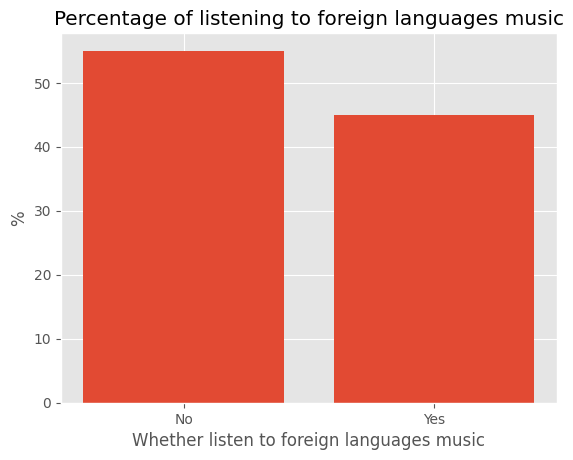

In [19]:
# Bar chart:
# Shows the overall percentage of people who listen to music with lyrics in a foreign language versus those who don't.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data)

# Calculate(Foreign languages-Yes) and (Foreign languages-No)
listening_count = data["Foreign languages"].value_counts()

# Calculate percentages
total_respondents = len(df)
percentages = (listening_count / total_respondents) * 100

# Plot the chart
plt.bar(percentages.index, percentages)
plt.xlabel('Whether listen to foreign languages music')
plt.ylabel('%')
plt.title('Percentage of listening to foreign languages music')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## Q3: How effective does music improve mental health?

**Finding --- Music's Role in Enhancing Mental Well-being**

Our study indicates that music has a largely positive impact on mental health, with 74.5% of participants noting improvements. Despite this, 23.1% saw no change, and 2.4% experienced a negative effect. This suggests that while music can be a beneficial tool for many, its effectiveness varies, highlighting the need for tailored music therapy approaches.


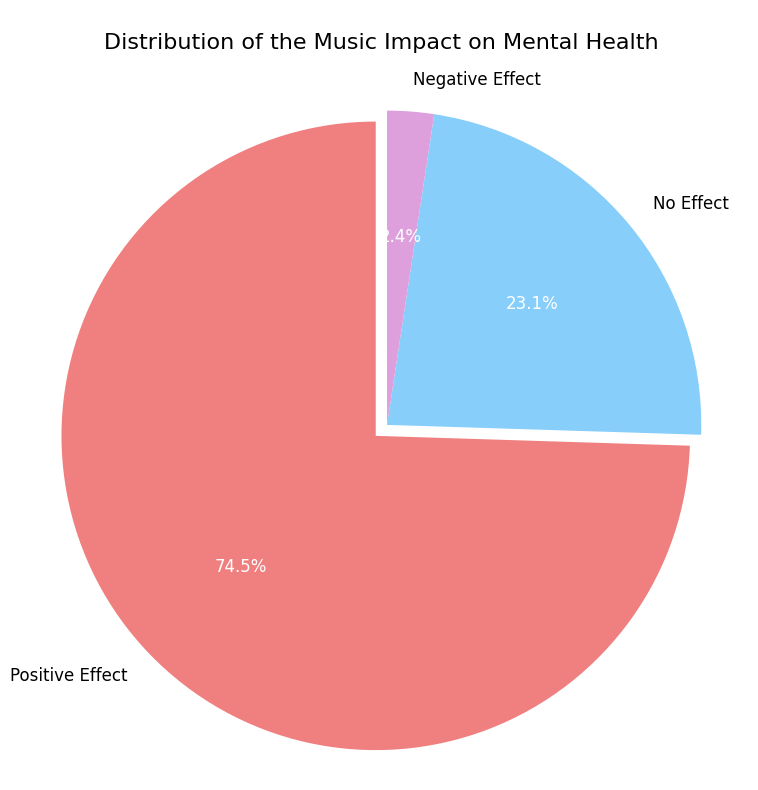

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data)

# 1. Pie Chart: Distribution of the Music Impact on Mental Health
positive_effect = 74.5
no_effect = 23.1
negative_effect = 2.4
effect_counts = [positive_effect, no_effect, negative_effect]
colors = ['lightcoral', 'lightskyblue', 'plum']

explode = (0.05, 0, 0)

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    effect_counts,
    explode=explode,
    colors=colors,
    labels=['Positive Effect', 'No Effect', 'Negative Effect'],
    autopct='%1.1f%%',
    textprops={'size': 'large'},
    startangle=90
)

plt.title('\nDistribution of the Music Impact on Mental Health\n', fontsize=16)

for i in range(len(autotexts)):
    autotexts[i].set_color('white')
    autotexts[i].set_fontsize(12)

plt.axis('equal')
plt.tight_layout()
plt.show()


# Convert categorized data in the 'Music effect' column to numeric values
effect_mapping = {'Improve': 1, 'No effect': 0, 'Worsen': -1}
df['Music effects'] = df['Music effects'].map(effect_mapping)

# Group by age
age_bins = [0, 18, 25, 35, 45, 55, 65, 75]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)



**Finding --- Music's Impact Varies by Age Group**


The study found that the mental health benefits of music differ across age groups. The elderly (66+) and adolescents showed the highest average positive effects (0.80 and 0.76, respectively), while middle-aged groups reported lower scores (0.66 for 26-35 and 0.55 for 36-45), possibly due to work and family stress. However, those aged 46-55 and 56-65 had higher scores (0.73 and 0.78), likely because they have more time to enjoy music's therapeutic benefits.

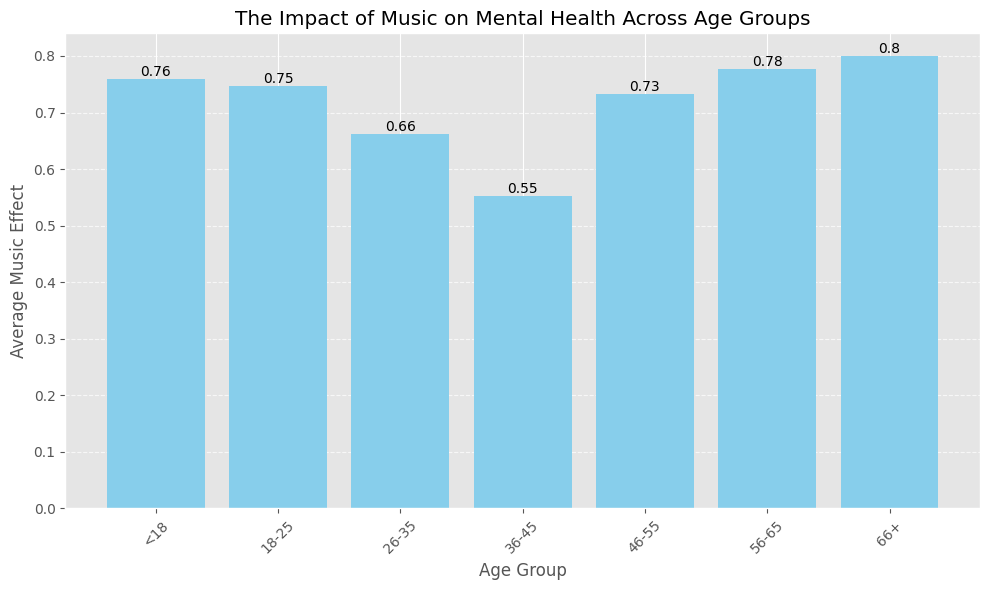

In [21]:
# 2. Bar Chart: Music's Impact on Mental Health Across Age Groups
age_groups = df.groupby('Age Group')['Music effects'].mean().reset_index()
plt.figure(figsize=(10, 6))
bars = plt.bar(age_groups['Age Group'], age_groups['Music effects'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Age Group')
plt.ylabel('Average Music Effect')
plt.title('The Impact of Music on Mental Health Across Age Groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Q4: Which age group has the most psychological problems?

**Finding--- Four kinds of mental illness distributed by age**

From these bar charts we can see that the main population groups for the four psychological problems anxiety, depression, insomnia and obsessive-compulsive disorder (OCD) are in the 10-30 age group. We can clearly see that the highest number of people suffering from these four psychological problems are in the age group of 15-19 years, followed by those in the age group of 20-24 years. This means that younger people may be more susceptible to psychological problems than older people.

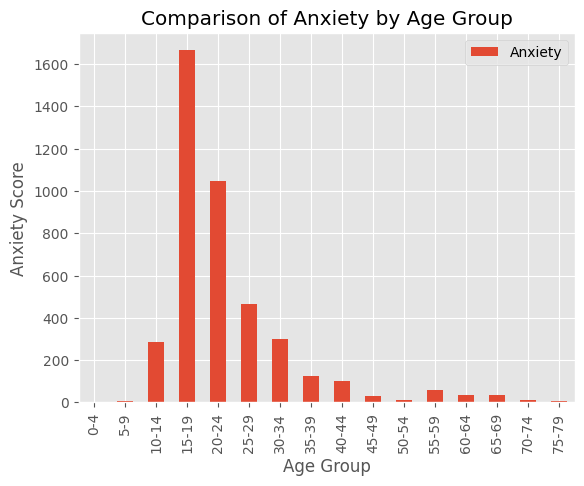

In [22]:
#4.1 Bar Chart: directly compares the ratings of psychological problems by age group.
# Divide the age groups into groups of 5 years old
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
labels = [f"{i}-{i+4}" for i in range(0, 80, 5)]
data["Age_Group"] = pd.cut(data["Age"], bins=bins, labels=labels)

# Aggregation of mental health indicators by age group
psychological_scores = data.groupby("Age_Group")[["Anxiety", "Depression", "Insomnia", "OCD"]].sum()

# Draw a bar chart of anxiety indicators
anxiety_scores = psychological_scores["Anxiety"]
anxiety_scores.plot(kind="bar", label="Anxiety")
plt.xlabel("Age Group")
plt.ylabel("Anxiety Score")
plt.title("Comparison of Anxiety by Age Group")
plt.legend()
plt.show()

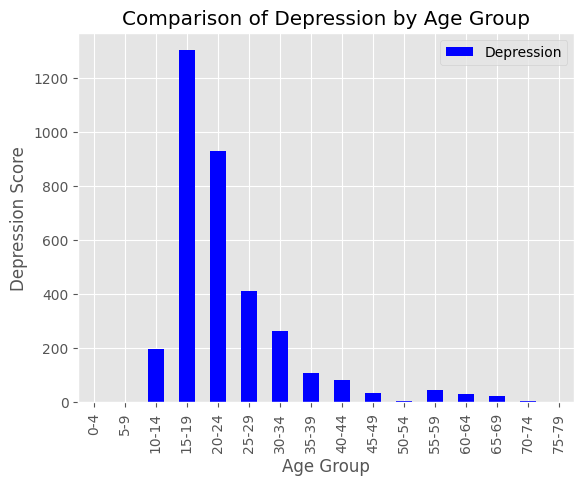

In [23]:
# Depression
depression_scores = psychological_scores["Depression"]
depression_scores.plot(kind="bar", label="Depression", color="blue")
plt.xlabel("Age Group")
plt.ylabel("Depression Score")
plt.title("Comparison of Depression by Age Group")
plt.legend()
plt.show()

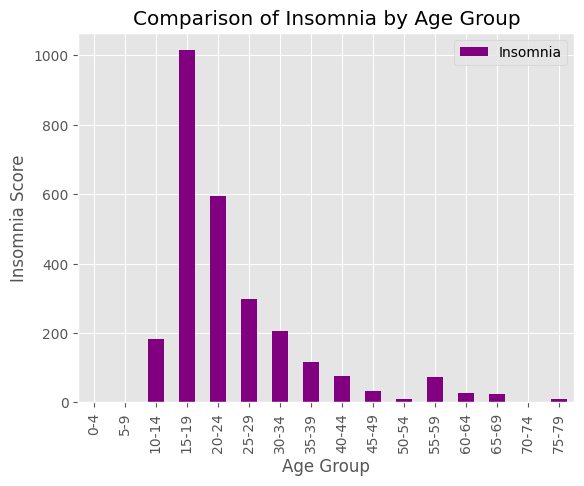

In [24]:
# Insomnia
insomnia_scores = psychological_scores["Insomnia"]
insomnia_scores.plot(kind="bar", label="Insomnia",color="purple")
plt.xlabel("Age Group")
plt.ylabel("Insomnia Score")
plt.title("Comparison of Insomnia by Age Group")
plt.legend()
plt.show()

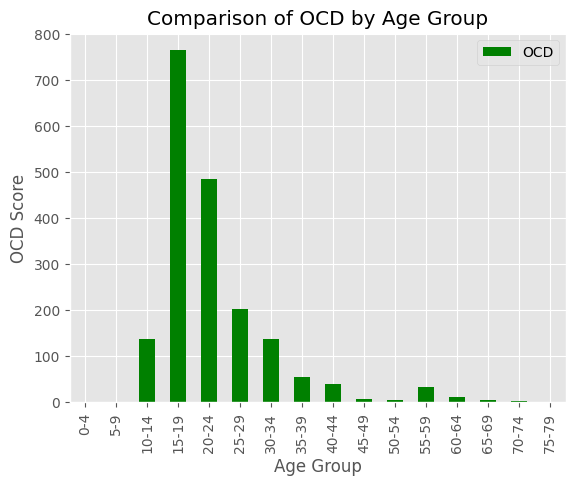

In [25]:
# OCD
ocd_scores = psychological_scores["OCD"]
ocd_scores.plot(kind="bar", label="OCD",color="green")
plt.xlabel("Age Group")
plt.ylabel("OCD Score")
plt.title("Comparison of OCD by Age Group")
plt.legend()
plt.show()

**Finding**

Anxiety has the highest score of the four psychological problems at over 1600, followed by depression at around 1400, indicating that more people are facing these two psychological problems.
The common age group of people with psychological problems is 1O-30 years old.


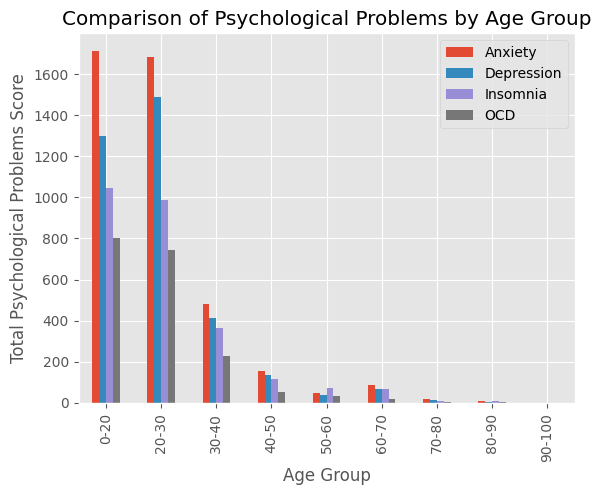

In [26]:
# Convert age to age group
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["0-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
data["Age Group"] = pd.cut(data["Age"], bins=bins, labels=labels, right=False)

# The total score of psychological problems was calculated for each age group
psychological_scores = data.groupby("Age Group")[["Anxiety", "Depression", "Insomnia", "OCD"]].sum()

# Draw a bar chart
psychological_scores.plot(kind="bar")
plt.xlabel("Age Group")
plt.ylabel("Total Psychological Problems Score")
plt.title("Comparison of Psychological Problems by Age Group")
plt.show()

**Finding--- Comparing the severity of the four mental illnesses at different ages**

The box plots show that the distribution of scores for the four psychological problems is similar across age groups, with median OCD scores generally lower than those of the other three psychological disorders, suggesting that it is relatively mild at all ages. 0 - 30 year olds have more concentrated psychological problems, with a small degree of dispersion. The distribution of scores for depression is scattered in the 30-50 age group; insomnia is scattered in the 50-60 age group; and obsessive-compulsive disorder (OCD) has an outlier in the 50-60 age group with a large degree of dispersion, suggesting that a minority of people in this age group have serious OCD problems.

<Figure size 1200x800 with 0 Axes>

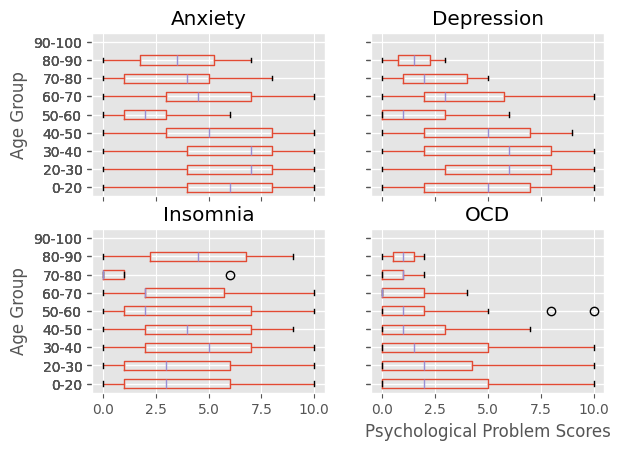

In [27]:
#4.2 Box plots: show the distribution of psychological problem scores for different age groups to help identify outliers and medians.
# Select the psychological problem column
psychological_columns = ["Anxiety", "Depression", "Insomnia", "OCD"]
# Resize graphics
plt.figure(figsize=(12, 8))
# Draw a horizontal box plot
boxplot = data.boxplot(column=psychological_columns, by="Age Group", vert=False)
plt.xlabel("Psychological Problem Scores")
plt.ylabel("Age Group")
plt.suptitle("")
plt.show()

## Q5: Which music is most popular among the main age groups for each psychological problem?

**Finding**
1. Rock is the most popular among people aged 10-30 with mental health issues, holding the largest proportion across all four types of mental illnesses;
2. Metal is the second most popular in this group, with the highest percentage of people with OCD listening to metal;
3. Gospel is the least popular among all categories of mental health issues, followed by Latin.


In [28]:
#From the previous chart, we can find that people aged 0 to 30 have the most psychological problems, so we will mainly study this age group below
#Define a function to get the total number of music types that listened most frequently by people aged 0-30 with severe anxiety disorders

def calculate_anxiety_frequency(df):
  filtered_df = df[  #Filters and constructs a new match table
      (df['Age'] >= 0) & (df['Age'] <= 30) &
      (df['Anxiety'] >= 5) ]
  music_categories = [
        'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
        'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
        'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
        'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
        'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
        'Frequency [Video game music]' ]
  anxietyTotals = []
  for i in music_categories:  #Iterate through each music type and sum the rows where the value is 'Very frequency'
    count_anxiety = (filtered_df[i] == 'Very frequently').sum()
    anxietyTotals.append(count_anxiety)
  return anxietyTotals

anxietyTotals = calculate_anxiety_frequency(data)
anxietyTotals



[50, 27, 55, 45, 6, 75, 28, 54, 21, 51, 81, 180, 69, 81, 203, 73]

In [29]:
def calculate_depression_frequency(df):
  filtered_df = df[
      (df['Age'] >= 0) & (df['Age'] <= 30) &
      (df['Depression'] >= 5) ]
  music_categories = [
        'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
        'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
        'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
        'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
        'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
        'Frequency [Video game music]' ]
  depressionTotals = []
  for i in music_categories:
    count_depression = (filtered_df[i] == 'Very frequently').sum()
    depressionTotals.append(count_depression)
  return depressionTotals

depressionTotals = calculate_depression_frequency(data)
depressionTotals

[45, 24, 45, 43, 4, 59, 25, 33, 18, 40, 71, 152, 59, 70, 170, 53]

In [30]:
def calculate_insomnia_frequency(df):
  filtered_df = df[
      (df['Age'] >= 0) & (df['Age'] <= 30) &
      (df['Insomnia'] >= 5) ]
  music_categories = [
        'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
        'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
        'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
        'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
        'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
        'Frequency [Video game music]' ]
  insomniaTotals = []
  for i in music_categories:
    count_insomnia = (filtered_df[i] == 'Very frequently').sum()
    insomniaTotals.append(count_insomnia)
  return insomniaTotals

insomniaTotals = calculate_insomnia_frequency(data)
insomniaTotals

[30, 10, 38, 27, 1, 42, 22, 28, 12, 35, 59, 92, 42, 45, 111, 44]

In [31]:
def calculate_ocd_frequency(df):
  filtered_df = df[
      (df['Age'] >= 0) & (df['Age'] <= 30) &
      (df['OCD'] >= 5) ]
  music_categories = [
        'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
        'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
        'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
        'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
        'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
        'Frequency [Video game music]' ]
  ocdTotals = []
  for i in music_categories:
    count_ocd = (filtered_df[i] == 'Very frequently').sum()
    ocdTotals.append(count_ocd)
  return ocdTotals

ocdTotals = calculate_ocd_frequency(data)
ocdTotals

[21, 11, 27, 15, 3, 30, 12, 26, 10, 23, 29, 67, 36, 34, 65, 26]

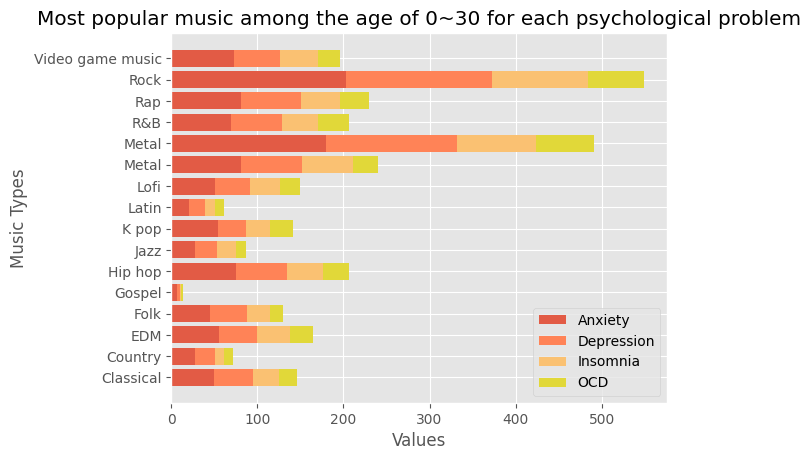

In [32]:
music_conditions = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi', 'Metal','Metal', 'R&B', 'Rap', 'Rock', 'Video game music']
y = range(len(music_conditions)) #Locate the position of each bar in the bar chart based on the list of music_conditions

plt.barh(y, anxietyTotals, label='Anxiety', color = "#E25B45")
plt.barh(y, depressionTotals, left=anxietyTotals, label='Depression', color = "#FF8357")
plt.barh(y, insomniaTotals, left=[i + j for i, j in zip(anxietyTotals, depressionTotals)], label='Insomnia', color = "#FAC172")
plt.barh(y, ocdTotals, left=[i + j + k for i, j, k in zip(anxietyTotals, depressionTotals, insomniaTotals)], label='OCD', color = "#E1D839")

plt.yticks(y, music_conditions)
plt.legend()
plt.xlabel('Values')
plt.ylabel('Music Types')
plt.title('Most popular music among the age of 0~30 for each psychological problem')


plt.show()


## Q6: Which music tempo (BPM) range is most effective in improving psychological problem?

**Finding**
1. Individuals with anxiety prefer songswith a bpm between 90-160, with those with severe anxiety favoring a bpm of 110-130;
2. Depression sufferers favor music from 70-180 bpm, with the majority preferring 110-130;
3. Those with Insomnia enjoy songsaround 70-200 bpm, with lightly affected individuals preferring 110-130;
4. OCD mainly individuals favor songs with a bpm of 90-180, with those scoring between 0-1 showing a preference for 110-130.


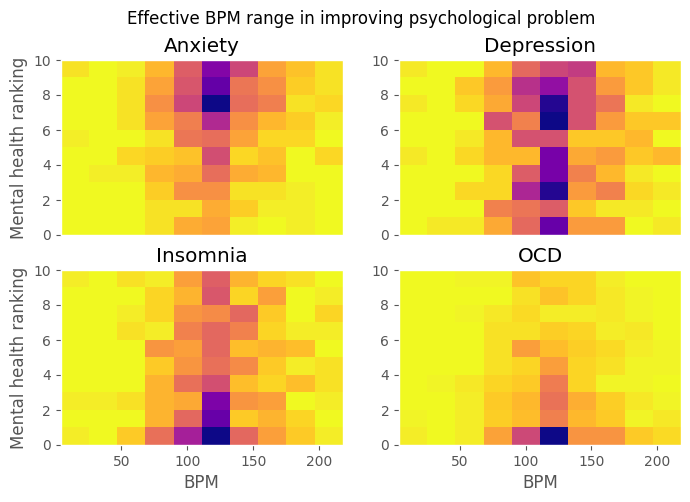

In [33]:
#For this question, we select those people who thought music can improve their mental health conditions to study
fig = plt.figure(figsize=(8, 5))
plt.suptitle("Effective BPM range in improving psychological problem")

improve_data = data[data['Music effects'] == 'Improve']
improve_data2 = improve_data[(improve_data["BPM"] > 0) & (improve_data["BPM"] <= 220)] #remove some extreme values

x = improve_data2["BPM"] #set the values of BPM as the X-axis
y1 = improve_data2["Anxiety"] #set the values of Anxiety as the Y-axis for the micro heatmap
y2 = improve_data2["Depression"]
y3 = improve_data2["Insomnia"]
y4 = improve_data2["OCD"]

ax = fig.add_subplot(221) #Generate 2*2 heatmaps, with this one in first place
plt.title('Anxiety')
plt.xticks([]) #Set the tick label on the X-axis to empty, no tick label is displayed
plt.ylabel('Mental health ranking')
plt.hist2d(x, y1, density=True, cmap='plasma_r');

ax = fig.add_subplot(222)
plt.title('Depression')
plt.xticks([])
plt.hist2d(x, y2, density=True, cmap='plasma_r');

ax = fig.add_subplot(223)
plt.title('Insomnia')
plt.ylabel('Mental health ranking')
plt.xlabel('BPM')
plt.hist2d(x, y3, density=True, cmap='plasma_r');

ax = fig.add_subplot(224)
plt.title('OCD')
plt.xlabel('BPM')
plt.hist2d(x, y4, density=True, cmap='plasma_r');

**Conclusion**

From all these reports, we see music has an impact on mental health issues. However, it's tied to numerous factors like age, music preferences, and listening duration. For more in-depth research, we need a more personalized and targeted approach. This might involve securing quantitative study data samples, focusing on individual factor impacts, and defining improvement levels. Future research and practices should focus on these areas to further explore the potential of music improving mental health.

# **Workload distribution**

**Gu Yunruo**: Background and analyse questions "What type of music is most popular in each country?" and "Does people regularly listen to music with lyrics in a language they are not fluent in?"<br>
**Zhang Huiyi**: Dataset Analysis and analyse question "How effective does music improve mental health?"<br>
**Zeng Yuting**: Data prepocessing and analyse question "Which age group has the most psychological problems?"<br>
**Hu Zexin**: Conclusion and analyse questions "Which music is most popular among the main age groups for each psychological problem?" and "Which music tempo (BPM) range is most effective in improving psychological problem?"